## **0. 루브릭**

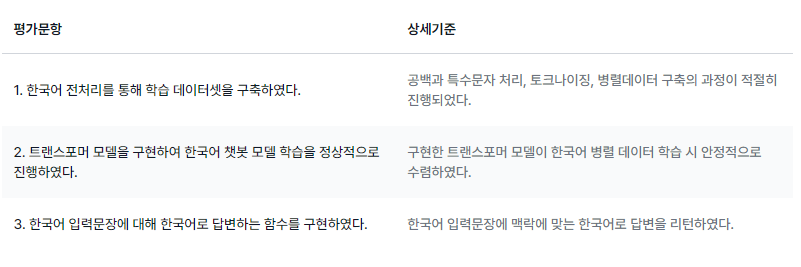

## **1. 실습(프로젝트)**

### **Step 1. 데이터 수집하기**
***

한국어 챗봇 데이터는 송영숙님이 공개한 챗봇 데이터를 사용합니다.

In [41]:
# 라이브러리 불러오기
import tensorflow as tf
import pandas as pd
import re
from konlpy.tag import Okt
import tensorflow_datasets as tfds

In [42]:
# 데이터 파일 경로 지정하기
data_file_path = '/aiffel/data/ChatbotData .csv'
# CSV 파일 읽어 DataFrame으로 불러오기
df = pd.read_csv(data_file_path)

In [43]:
# 데이터 살펴보기
df.head()

,Q,A,label
0,12시 땡!,하루가 또 가네요.,0
1,1지망 학교 떨어졌어,위로해 드립니다.,0
2,3박4일 놀러가고 싶다,여행은 언제나 좋죠.,0
3,3박4일 정도 놀러가고 싶다,여행은 언제나 좋죠.,0
4,PPL 심하네,눈살이 찌푸려지죠.,0


### **Step 2. 데이터 전처리하기**
***

영어 데이터와는 전혀 다른 데이터인 만큼 

영어 데이터에 사용했던 전처리와 일부 동일한 전처리도 필요하겠지만 

전체적으로는 다른 전처리를 수행해야 할 수도 있습니다.

In [44]:
questions = df['Q'].tolist()  # 질문 컬럼을 리스트로 변환하기
answers = df['A'].tolist()  # 답변 컬럼을 리스트로 변환하기

In [45]:
# Okt 객체를 생성하여 okt 변수에 저장하기
# 이 객체를 사용하여 한국어 문장을 형태소 단위로 분석할 수 있음.
okt = Okt()

전처리 함수를 구현해보자.

In [46]:
# 전처리 함수 구현하기
def preprocess_sentence(sentence):
    # 문장을 소문자로 변환하고 양쪽 공백을 제거하기
    sentence = sentence.lower().strip()
    # 문장 부호 앞에 공백을 추가하기
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    # 여러 개의 공백을 하나의 공백으로 변환하기
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 알파벳, 숫자, 한국어 문자를 제외한 모든 문자를 공백으로 변환하기
    sentence = re.sub(r"[^a-zA-Z가-힣0-9?.!,]+", " ", sentence)
    # 한국어 형태소 분석기를 사용하여 형태소 단위로 분리하기
    sentence = ' '.join(okt.morphs(sentence))
    return sentence.strip()

In [47]:
# 질문과 답변에 대해 전처리 함수를 적용해보자.

# 모든 질문 문장 전처리하기
questions = [preprocess_sentence(q) for q in questions]
# 모든 답변 문장 전처리하기
answers = [preprocess_sentence(a) for a in answers]

In [48]:
# 전처리된 질문과 답변 확인해보기
questions, answers

(['12시 땡 !',
  '1 지망 학교 떨어졌어',
  '3 박 4일 놀러 가고 싶다',
  '3 박 4일 정도 놀러 가고 싶다',
  'ppl 심하네',
  'sd 카드 망가졌어',
  'sd 카드 안 돼',
  'sns 맞팔 왜 안 하지',
  'sns 시간 낭비 인 거 아는데 매일 하는 중',
  'sns 시간 낭비 인데 자꾸 보게 됨',
  'sns 보면 나 만 빼고 다 행복 해보여',
  '가끔 궁금해',
  '가끔 뭐 하는지 궁금해',
  '가끔 은 혼자 인게 좋다',
  '가난한 자의 설움',
  '가만 있어도 땀 난다',
  '가상 화폐 쫄딱 망함',
  '가스 불 켜고 나갔어',
  '가스 불 켜놓고 나온거 같아',
  '가스 비 너무 많이 나왔다 .',
  '가스 비 비싼데 감기 걸리겠어',
  '가스 비 장난 아님',
  '가장 확실한 건 뭘 까 ?',
  '가족 여행 가기 로 했어',
  '가족 여행 고고',
  '가족 여행 어디 로 가지 ?',
  '가족 있어 ?',
  '가족 관계 알려 줘',
  '가족 끼리 여행 간다 .',
  '가족 들 보고 싶어',
  '가족 들 이랑 서먹해',
  '가족 들 이랑 서먹해졌어',
  '가족 들 이랑 어디 가지 ?',
  '가족 들 이랑 여행 갈거야',
  '가족 여행 가야 지',
  '가족 이 누구 야 ?',
  '가족 이랑 여행 가려고',
  '가족 한테 스트레스 풀었어',
  '가출 할까 ?',
  '가출 해도 갈 데 가 없어',
  '간만 에 떨리니까 좋더라',
  '간만 에 쇼핑 중',
  '간만 에 휴식 중',
  '간식 뭐 먹을까',
  '간식 추천',
  '간장 치킨 시켜야지',
  '간접흡연 싫어',
  '갈까 말까 고민 돼',
  '갈까 말까 ?',
  '감 말랭이 먹고 싶다 .',
  '감 말랭이 먹어야지',
  '감기 같 애',
  '감기 걸린 것 같아',
  '감기 기운 이 있어',
  '감기 들 거 같 애',
  '감기 가 오려나',
  '감기 약 이 없어',
  '감기

### **Step 3. SubwordTextEncoder 사용하기**
***

한국어 데이터는 형태소 분석기를 사용하여 토크나이징을 해야 한다고 많은 분이 알고 있습니다. 

하지만 여기서는 형태소 분석기가 아닌 위 실습에서 사용했던 내부 단어 토크나이저인 SubwordTextEncoder를 그대로 사용해보세요.

In [49]:
# SubwordTextEncoder 사용하기
import tensorflow_datasets as tfds

# 질문과 답변 데이터로부터 서브워드 텍스트 인코더 만들기
tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    questions + answers, target_vocab_size=2**13)

두 개의 토큰을 추가해 주었기 때문에 단어장의 크기도 +2임을 명시해 주어야 함.

In [50]:
# 시작 토큰과 종료 토큰 설정하기
START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size + 1]
# 단어 사전의 크기 설정하기
VOCAB_SIZE = tokenizer.vocab_size + 2
# 최대 시퀀스 길이 설정하기
MAX_LENGTH = 50

시작 토큰과 종료 토큰에 부여된 정수를 출력해보자.

In [51]:
print('START_TOKEN의 번호 :' ,[tokenizer.vocab_size])
print('END_TOKEN의 번호 :' ,[tokenizer.vocab_size + 1])

START_TOKEN의 번호 : [7274]
END_TOKEN의 번호 : [7275]


In [52]:
print('단어의 크기 :' ,VOCAB_SIZE)

단어의 크기 : 7276


최대 길이를 설정하고, 정수를 인코딩 및 패딩하자.

In [53]:
# 정수 인코딩 및 패딩하기(함수 구현하기)
def tokenize_and_filter(inputs, outputs):
    tokenized_inputs, tokenized_outputs = [], []
    
    for (sentence1, sentence2) in zip(inputs, outputs):
        # 입력 문장 인코딩하고 시작 및 종료 토큰 추가하기
        sentence1 = START_TOKEN + tokenizer.encode(sentence1) + END_TOKEN
        # 출력 문장 인코딩하고 시작 및 종료 토큰 추가하기
        sentence2 = START_TOKEN + tokenizer.encode(sentence2) + END_TOKEN
        
        # 문장이 최대 길이 이하인 경우
        if len(sentence1) <= MAX_LENGTH and len(sentence2) <= MAX_LENGTH:
            tokenized_inputs.append(sentence1)  # 토큰화된 입력 문장 추가하기
            tokenized_outputs.append(sentence2)  # 토큰화된 출력 문장 추가하기
       
    # 입력 문장 패딩하기
    tokenized_inputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_inputs, maxlen=MAX_LENGTH, padding='post')
    # 출력 문장 패딩하기
    tokenized_outputs = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_outputs, maxlen=MAX_LENGTH, padding='post')
    
    # 패딩된 문장들 반환하기
    return tokenized_inputs, tokenized_outputs

In [54]:
# 전처리된 질문과 답변을 정수 인코딩 및 패딩 처리하기
questions, answers = tokenize_and_filter(questions, answers)

In [55]:
# 결과 확인하기
questions, answers

(array([[7274, 5218,  713, ...,    0,    0,    0],
        [7274,  809,   88, ...,    0,    0,    0],
        [7274,  458, 1314, ...,    0,    0,    0],
        ...,
        [7274, 7255, 7175, ...,    0,    0,    0],
        [7274,  164,   85, ...,    0,    0,    0],
        [7274, 1680,  120, ...,    0,    0,    0]], dtype=int32),
 array([[7274,  233,    3, ...,    0,    0,    0],
        [7274,  332,   71, ...,    0,    0,    0],
        [7274,  230,   12, ...,    0,    0,    0],
        ...,
        [7274, 3679,  457, ...,    0,    0,    0],
        [7274,   20, 2204, ...,    0,    0,    0],
        [7274,  409,  642, ...,    0,    0,    0]], dtype=int32))

### **Step 4. 모델 구성하기**
***

위 실습 내용을 참고하여 트랜스포머 모델을 구현합니다.

인코더, 디코더, 포지셔널 인코딩, 멀티헤드 어텐션 등을 활용하기

**포지셔널 인코딩 클래스 구현하기**

트랜스포머 모델에서 위치 정보를 인코딩하기 위해 사용됨. 트랜스포머 모델은 입력 시퀀스의 순서를 고려하지 않기 때문에, 위치 정보를 추가하여 순서에 대한 정보를 제공해야 함.

In [56]:
# 포지셔널 인코딩 클래스 구현하기
class PositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_position, d_model):
        # 부모 클래스(tf.keras.layers.Layer)의 생성자 호출하기
        super(PositionalEncoding, self).__init__()
        # 주어진 max_position과 d_model을 사용하여 positional encoding 계산하기
        self.pos_encoding = self.positional_encoding(max_position, d_model)

    def get_angles(self, position, i, d_model):
        angles = 1 / tf.pow(10000, (2 * (i // 2)) / tf.cast(d_model, tf.float32))  # 각도(angles)를 계산하기
        return position * angles  # 위치(position)와 각도(angles)를 곱하여 반환하기

    def positional_encoding(self, position, d_model):
        angle_rads = self.get_angles(
            position=tf.range(position, dtype=tf.float32)[:, tf.newaxis],  # 위치 인덱스를 생성하기
            i=tf.range(d_model, dtype=tf.float32)[tf.newaxis, :],  # 모델 차원 인덱스를 생성하기
            d_model=d_model)  # 모델 차원을 전달하기
        sines = tf.math.sin(angle_rads[:, 0::2])  # 사인 함수를 사용하여 짝수 인덱스의 각도 계산하기
        cosines = tf.math.cos(angle_rads[:, 1::2])  # 코사인 함수를 사용하여 홀수 인덱스의 각도 계산하기
        pos_encoding = tf.concat([sines, cosines], axis=-1)  # 사인과 코사인 값을 쌓아서 pos_encoding 만들기
        pos_encoding = pos_encoding[tf.newaxis, ...]  # 새로운 차원을 추가하여 배치를 지원하도록 하기
        return tf.cast(pos_encoding, tf.float32)  # pos_encoding을 float32 형식으로 변환하여 반환하기

    def call(self, inputs):
        # 레이어의 입력(inputs)에 위치 인코딩(pos_encoding)을 더하여 반환하기
        return inputs + self.pos_encoding[:, :tf.shape(inputs)[1], :]

**스케일드 닷 프로덕트 어텐션 함수 구현하기**

In [57]:
# 스케일드 닷 프로덕트 어텐션 함수 구현하기
def scaled_dot_product_attention(query, key, value, mask):
    # Query와 Key의 내적을 수행하여 어텐션 점수 계산하기
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    # Scaled factor를 적용하여 스케일링 수행하기
    dk = tf.cast(tf.shape(key)[-1], tf.float32)
    # 스케일링 된 어텐션 로짓 계산하기
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)
    if mask is not None:
        # 마스크를 어텐션 로짓에 적용하기
        scaled_attention_logits += (mask * -1e9)
    # 어텐션 가중치 계산하기
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    # 어텐션 가중치를 Value에 곱하여 최종 출력 계산하기
    output = tf.matmul(attention_weights, value)
    return output  # 최종 출력 반환하기

**멀티 헤드 어텐션 함수 구현하기**

입력을 여러 개의 '헤드'로 나누어 병렬로 어텐션을 수행한 후, 이 결과들을 결합하여 최종 출력을 생성함.

In [58]:
# 멀티 헤드 어텐션 함수 구현하기
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()  # 부모 클래스(tf.keras.layers.Layer)의 생성자 호출하기
        self.num_heads = num_heads  # num_heads 초기화하기
        self.d_model = d_model  # d_model 초기화하기
        assert d_model % self.num_heads == 0  # d_model은 num_heads로 나누어 떨어져야 하기
        self.depth = d_model // self.num_heads  # 각 헤드의 깊이 계산하기
        self.query_dense = tf.keras.layers.Dense(units=d_model)  # Query를 위한 Dense 레이어 정의하기
        self.key_dense = tf.keras.layers.Dense(units=d_model)  # Key를 위한 Dense 레이어 정의하기
        self.value_dense = tf.keras.layers.Dense(units=d_model)  # Value를 위한 Dense 레이어 정의하기
        self.dense = tf.keras.layers.Dense(units=d_model)  # 최종 출력 값을 위한 Dense 레이어 정의하기

    def split_heads(self, inputs, batch_size):
        # 입력을 (batch_size, 시퀀스 길이, num_heads, depth)로 재구성하기
        inputs = tf.reshape(inputs, shape=(batch_size, -1, self.num_heads, self.depth))
        # 텐서를 전치하여 (batch_size, num_heads, 시퀀스 길이, depth)로 만들기
        return tf.transpose(inputs, perm=[0, 2, 1, 3])

    def call(self, inputs):
        # 입력 딕셔너리에서 query, key, value, mask 추출하기
        query, key, value, mask = inputs['query'], inputs['key'], inputs['value'], inputs['mask']
        batch_size = tf.shape(query)[0]  # 배치 크기 구하기
        query = self.query_dense(query)  # Query에 Dense 레이어 적용하기
        key = self.key_dense(key)  # Key에 Dense 레이어 적용하기
        value = self.value_dense(value)  # Value에 Dense 레이어 적용하기
        query = self.split_heads(query, batch_size)  # Query를 여러 헤드로 나누기
        key = self.split_heads(key, batch_size)  # Key를 여러 헤드로 나누기
        value = self.split_heads(value, batch_size)  # Value를 여러 헤드로 나누기
        scaled_attention = scaled_dot_product_attention(query, key, value, mask)  # Scaled Dot-Product Attention 적용하기
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])  # Attention 출력을 전치하여 원래 형태로 되돌리기
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))  # 전치된 출력을 연결하기
        outputs = self.dense(concat_attention)  # 연결된 출력에 Dense 레이어를 적용하여 최종 출력 만들기
        return outputs  # 최종 출력 반환하기

**패딩 마스크 생성 함수**

패딩 마스크는 시퀀스 내의 패딩 토큰을 무시하도록 하는 역할을 함.

트랜스포머 모델은 패딩 토큰을 의미 있는 단어로 인식해서는 안 되기 때문에, 패딩 마스크를 사용하여 패딩 위치를 가짐.

In [59]:
def create_padding_mask(x):
    # 입력 텐서에서 패딩 토큰(0)에 해당하는 위치 찾기
    mask = tf.cast(tf.math.equal(x, 0), tf.float32)
    # 마스크 텐서의 차원을 확장하여 (batch_size, 1, 1, seq_len) 형태로 만들기
    return mask[:, tf.newaxis, tf.newaxis, :]

**룩 어헤드 마스크 생성 함수**

디코더에서 다음 단어를 예측할 때 이전 단어들만을 참고하도록 하기 위해 사용됨.

현재 위치 이후의 단어들을 마스킹하여 볼 수 없도록 함.

In [60]:
# 룩 어헤드 마스크 생성 함수 구현하기
def create_look_ahead_mask(x):
    seq_len = tf.shape(x)[1]  # 시퀀스의 길이 구하기
    # 트라이앵글 마스크를 생성하여 상삼각 행렬 만들기
    look_ahead_mask = 1 - tf.linalg.band_part(tf.ones((seq_len, seq_len)), -1, 0)
    padding_mask = create_padding_mask(x)  # 패딩 마스크 생성하기
    # 룩 어헤드 마스크와 패딩 마스크를 결합하여 최종 마스크 만들기
    return tf.maximum(look_ahead_mask, padding_mask)

**인코더 레이어 생성 함수 및 인코더 생성 함수 구현하기**

인코더 레이어는 트랜스포머 모델의 기본 구성 요소로,

각 레이어는 **멀티 헤드 어텐션**과 **피드포워드 네트워크**로 구성됨.

In [61]:
# 인코더 레이어 생성 함수 구현하기
def encoder_layer(units, d_model, num_heads, dropout, name="encoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")  # 입력 텐서 정의하기
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")  # 패딩 마스크 입력 텐서 정의하기
    attention = MultiHeadAttention(d_model, num_heads)({
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': padding_mask
    })  # Multi-Head Attention 적용하기
    attention = tf.keras.layers.Dropout(rate=dropout)(attention)  # 드롭아웃 적용하기
    attention = tf.keras.layers.LayerNormalization(epsilon=1e-6)(inputs + attention)  # 잔차 연결 후 Layer Normalization 적용하기
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention)  # 첫 번째 완전 연결 층 적용하기
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # 두 번째 완전 연결 층 적용하기
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)  # 드롭아웃 적용하기
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention + outputs)  # 잔차 연결 후 Layer Normalization 적용하기
    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)  # 인코더 레이어 모델 반환하기

In [62]:
# 인코더 생성 함수 구현하기
def encoder(vocab_size, num_layers, units, d_model, num_heads, dropout, max_position, name="encoder"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")  # 입력 텐서 정의하기
    padding_mask = tf.keras.Input(shape=(1, 1, None), name="padding_mask")  # 패딩 마스크 입력 텐서 정의하기
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)  # 임베딩 적용하기
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))  # 임베딩 값 스케일링하기
    embeddings = PositionalEncoding(max_position, d_model)(embeddings)  # 위치 인코딩 적용하기
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)  # 드롭아웃 적용하기
    for i in range(num_layers):
        outputs = encoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name="encoder_layer_{}".format(i)
        )([outputs, padding_mask])  # 각 인코더 레이어 쌓기
    return tf.keras.Model(inputs=[inputs, padding_mask], outputs=outputs, name=name)  # 인코더 모델 반환하기

**디코더 레이어 생성 함수 및 디코더 생성 함수 구현하기**

디코더 레이어는 트랜스포머 모델의 기본 구성 요소로, **멀티 헤드 어텐션**과 **피드포워드 신경망**으로 구성됨.

디코더 레이어는 두 개의 멀티 헤드 어텐션을 포함하는데, **셀프 어텐션**과 **인코더-디코더 어텐션**임.

In [63]:
# 디코더 레이어 생성 함수 정의하기
def decoder_layer(units, d_model, num_heads, dropout, name="decoder_layer"):
    inputs = tf.keras.Input(shape=(None, d_model), name="inputs")  # 입력 텐서 정의하기
    enc_outputs = tf.keras.Input(shape=(None, d_model), name="encoder_outputs")  # 인코더 출력 텐서 정의하기
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name="look_ahead_mask")  # 룩 어헤드 마스크 입력 텐서 정의하기
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')  # 패딩 마스크 입력 텐서 정의하기
    attention1 = MultiHeadAttention(d_model, num_heads)({
        'query': inputs,
        'key': inputs,
        'value': inputs,
        'mask': look_ahead_mask
    })  # 첫 번째 Multi-Head Attention 적용하기
    # 잔차 연결 후 Layer Normalization 적용하기
    attention1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention1 + inputs)
    attention2 = MultiHeadAttention(d_model, num_heads)({
        'query': attention1,
        'key': enc_outputs,
        'value': enc_outputs,
        'mask': padding_mask
    })  # 두 번째 Multi-Head Attention 적용하기
    attention2 = tf.keras.layers.Dropout(rate=dropout)(attention2)  # 드롭아웃 적용하기
    # 잔차 연결 후 Layer Normalization 적용하기
    attention2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)(attention2 + attention1)
    outputs = tf.keras.layers.Dense(units=units, activation='relu')(attention2)  # 첫 번째 완전 연결 층 적용하기
    outputs = tf.keras.layers.Dense(units=d_model)(outputs)  # 두 번째 완전 연결 층 적용하기
    outputs = tf.keras.layers.Dropout(rate=dropout)(outputs)  # 드롭아웃 적용하기
    # 잔차 연결 후 Layer Normalization 적용하기
    outputs = tf.keras.layers.LayerNormalization(epsilon=1e-6)(outputs + attention2)
    # 디코더 레이어 모델 반환하기
    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], outputs=outputs, name=name)

In [64]:
# 디코더 생성 함수 정의하기
def decoder(vocab_size, num_layers, units, d_model, num_heads, dropout, max_position, name='decoder'):
    inputs = tf.keras.Input(shape=(None,), name='inputs')  # 입력 텐서 정의하기
    enc_outputs = tf.keras.Input(shape=(None, d_model), name='encoder_outputs')  # 인코더 출력 텐서 정의하기
    look_ahead_mask = tf.keras.Input(shape=(1, None, None), name='look_ahead_mask')  # 룩 어헤드 마스크 입력 텐서 정의하기
    padding_mask = tf.keras.Input(shape=(1, 1, None), name='padding_mask')  # 패딩 마스크 입력 텐서 정의하기
    embeddings = tf.keras.layers.Embedding(vocab_size, d_model)(inputs)  # 임베딩 적용하기
    embeddings *= tf.math.sqrt(tf.cast(d_model, tf.float32))  # 임베딩 값 스케일링하기
    embeddings = PositionalEncoding(max_position, d_model)(embeddings)  # 위치 인코딩 적용하기
    outputs = tf.keras.layers.Dropout(rate=dropout)(embeddings)  # 드롭아웃 적용하기
    for i in range(num_layers):
        outputs = decoder_layer(
            units=units,
            d_model=d_model,
            num_heads=num_heads,
            dropout=dropout,
            name='decoder_layer_{}'.format(i)
        )(inputs=[outputs, enc_outputs, look_ahead_mask, padding_mask])  # 각 디코더 레이어 쌓기
    # 디코더 모델 반환하기
    return tf.keras.Model(inputs=[inputs, enc_outputs, look_ahead_mask, padding_mask], 
                          outputs=outputs, name=name)

**트랜스포머 모델 생성 함수**

트랜스포머 모델은 인코더와 디코더로 구성되며,

입력 시퀀스를 인코딩하고 디코딩하여 최종 출력을 생성함.

In [65]:
# 트랜스포머 모델 생성 함수 정의하기
def transformer(vocab_size, num_layers, units, d_model, num_heads, dropout, max_position, name="transformer"):
    inputs = tf.keras.Input(shape=(None,), name="inputs")  # 인코더 입력 텐서 정의하기
    dec_inputs = tf.keras.Input(shape=(None,), name="dec_inputs")  # 디코더 입력 텐서 정의하기
    enc_padding_mask = tf.keras.layers.Lambda(create_padding_mask, 
                                              output_shape=(1, 1, None), 
                                              name='enc_padding_mask')(inputs)  # 인코더 패딩 마스크 생성하기
    look_ahead_mask = tf.keras.layers.Lambda(create_look_ahead_mask, 
                                             output_shape=(1, None, None), 
                                             name='look_ahead_mask')(dec_inputs)  # 룩 어헤드 마스크 생성하기
    dec_padding_mask = tf.keras.layers.Lambda(create_padding_mask, 
                                              output_shape=(1, 1, None), 
                                              name='dec_padding_mask')(inputs)  # 디코더 패딩 마스크 생성하기
    enc_outputs = encoder(vocab_size, num_layers, 
                          units, d_model, num_heads, 
                          dropout, max_position)([inputs, enc_padding_mask])  # 인코더 출력 계산하기
    dec_outputs = decoder(vocab_size, num_layers, 
                          units, d_model, num_heads,
                          # 디코더 출력 계산하기
                          dropout, max_position)([dec_inputs, enc_outputs, look_ahead_mask, dec_padding_mask])
    outputs = tf.keras.layers.Dense(units=vocab_size, name="outputs")(dec_outputs)  # 최종 출력 Dense 레이어 정의하기
    return tf.keras.Model(inputs=[inputs, dec_inputs], outputs=outputs, name=name)  # 트랜스포머 모델 반환하기

**하이퍼파라미터 설정 및 모델 생성하기**

트랜스 포머 모델을 생성하기 위해 필요한 하이퍼파라미터를 설정하고 모델을 설정해보자.

In [66]:
# 하이퍼파라미터 설정하기
NUM_LAYERS = 2  # 인코더와 디코더의 층의 개수 설정하기
D_MODEL = 256  # 인코더와 디코더 내부의 입, 출력의 고정 차원 설정하기
NUM_HEADS = 8  # 멀티 헤드 어텐션에서의 헤드 수 설정하기
UNITS = 512  # 피드 포워드 신경망의 은닉층의 크기 설정하기
DROPOUT = 0.1  # 드롭아웃의 비율 설정하기
MAX_POSITION = 50  # 최대 시퀀스 길이 설정하기

In [67]:
# 트랜스포머 모델 생성하기
model = transformer(
    vocab_size=VOCAB_SIZE,
    num_layers=NUM_LAYERS,
    units=UNITS,
    d_model=D_MODEL,
    num_heads=NUM_HEADS,
    dropout=DROPOUT,
    max_position=MAX_POSITION
)

In [68]:
# 모델 요약하기
model.summary()

Model: "transformer"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs (InputLayer)             [(None, None)]       0                                            
__________________________________________________________________________________________________
dec_inputs (InputLayer)         [(None, None)]       0                                            
__________________________________________________________________________________________________
enc_padding_mask (Lambda)       (None, 1, 1, None)   0           inputs[0][0]                     
__________________________________________________________________________________________________
encoder (Functional)            (None, None, 256)    2916864     inputs[0][0]                     
                                                                 enc_padding_mask[0][0] 

### **Step 5. 모델 평가하기**
***

Step 1에서 선택한 전처리 방법을 고려하여 입력된 문장에 대해서 대답을 얻는 예측 함수를 만듭니다.

In [69]:
BATCH_SIZE = 64  # 배치 크기 설정하기
BUFFER_SIZE = 20000  # 버퍼 크기 설정하기

dataset = tf.data.Dataset.from_tensor_slices((
    {
        'inputs': questions,
        'dec_inputs': answers[:, :-1]
    },
    {
        'outputs': answers[:, 1:]
    },
))  # 데이터셋 만들기

dataset = dataset.cache()  # 데이터셋 캐싱하기
dataset = dataset.shuffle(BUFFER_SIZE)  # 데이터셋 셔플하기
dataset = dataset.batch(BATCH_SIZE)  # 배치 크기로 데이터셋 나누기
dataset = dataset.prefetch(tf.data.experimental.AUTOTUNE)

In [70]:
# 커스텀 학습률 스케줄링 정의하기
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()  # 부모 클래스(tf.keras.optimizers.schedules.LearningRateSchedule)의 생성자 호출하기
        self.d_model = d_model  # 모델 차원 수 초기화하기
        self.d_model = tf.cast(self.d_model, tf.float32)  # 모델 차원 수를 float32 형식으로 변환하기
        self.warmup_steps = warmup_steps  # 워밍업 단계 수 초기화하기

    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)  # 첫 번째 인자 계산하기
        arg2 = step * (self.warmup_steps**-1.5)  # 두 번째 인자 계산하기
        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)  # 학습률 계산하여 반환하기

In [71]:
# 트랜스포머 모델의 학습률을 조정하기 위한 커스텀 학습률 스케줄러 정의하기
learning_rate = CustomSchedule(D_MODEL)
# 커스텀 학습률 스케줄러를 사용하는 Adam 옵티마이저 정의하기
optimizer = tf.keras.optimizers.Adam(
    learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)

In [72]:
# 정확도 계산하는 함수 정의하기
def accuracy(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))  # y_true 텐서 재구성하기
    return tf.keras.metrics.sparse_categorical_accuracy(y_true, y_pred)

In [73]:
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

In [74]:
# 손실 함수 정의하기
def loss_function(y_true, y_pred):
    y_true = tf.reshape(y_true, shape=(-1, MAX_LENGTH - 1))  # y_true 텐서 재구성하기
    loss = tf.keras.losses.sparse_categorical_crossentropy(
        y_true, y_pred, from_logits=True)  # 손실 계산하기
    mask = tf.cast(tf.not_equal(y_true, 0), tf.float32)  # 마스크 생성하기
    loss = tf.reduce_sum(loss * mask, axis=-1) / tf.reduce_sum(mask, axis=-1)  # 마스크를 적용하여 손실 계산하기
    return loss  # 손실 반환하기

In [75]:
# 모델 컴파일하기
model.compile(optimizer=optimizer, 
              loss=loss_function, 
              metrics=[accuracy])

In [91]:
# 학습 에포크 수 설정하고 모델 학습하기
EPOCHS = 100  # 학습 에포크 수 설정하기
model.fit(dataset, epochs=EPOCHS, verbose=1)  # 모델 학습하기

Epoch 1/100
185/185 [==============================] - 12s 66ms/step - loss: 0.0285 - accuracy: 0.1593
Epoch 2/100
185/185 [==============================] - 12s 66ms/step - loss: 0.0269 - accuracy: 0.1594
Epoch 3/100
185/185 [==============================] - 12s 65ms/step - loss: 0.0275 - accuracy: 0.1593
Epoch 4/100
185/185 [==============================] - 12s 65ms/step - loss: 0.0263 - accuracy: 0.1594
Epoch 5/100
185/185 [==============================] - 12s 64ms/step - loss: 0.0262 - accuracy: 0.1594
Epoch 6/100
185/185 [==============================] - 12s 64ms/step - loss: 0.0245 - accuracy: 0.1595
Epoch 7/100
185/185 [==============================] - 12s 65ms/step - loss: 0.0249 - accuracy: 0.1595
Epoch 8/100
185/185 [==============================] - 12s 65ms/step - loss: 0.0231 - accuracy: 0.1595
Epoch 9/100
185/185 [==============================] - 12s 66ms/step - loss: 0.0241 - accuracy: 0.1596
Epoch 10/100
185/185 [==============================] - 12s 64ms/step - l

In [92]:
# 입력 문장을 기반으로 챗봇이 예측한 답변을 정수 시퀀스로 생성하기
def decoder_inference(sentence):
    sentence = preprocess_sentence(sentence)  # 입력 문장 전처리하기
    sentence = tf.expand_dims(
        # 입력 문장을 정수 인코딩 후, 시작 토큰과 종료 토큰 추가하기
        START_TOKEN + tokenizer.encode(sentence) + END_TOKEN, axis=0)
    output_sequence = tf.expand_dims(START_TOKEN, 0)  # 디코더의 현재까지의 예측한 출력 시퀀스 초기화하기
    for i in range(MAX_LENGTH):
        predictions = model(inputs=[sentence, output_sequence], training=False)  # 디코더의 인퍼런스 단계 수행하기
        predictions = predictions[:, -1:, :]  # 현재 예측한 단어의 정수 추출하기
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)  # 예측한 단어의 정수 계산하기
        if tf.equal(predicted_id, END_TOKEN[0]):
            break  # 종료 토큰을 예측한 경우 반복 종료하기
            # 예측한 단어들을 지속적으로 output_sequence에 추가하기
        output_sequence = tf.concat([output_sequence, predicted_id], axis=-1)
    return tf.squeeze(output_sequence, axis=0)  # 최종 예측된 출력 시퀀스 반환하기

In [93]:
# 입력 문장을 기반으로 챗봇이 예측한 답변을 텍스트로 변환하여 출력하기
def sentence_generation(sentence):
    # # 입력 문장에 대해 디코더를 동작 시켜 예측된 정수 시퀀스 리턴받기
    prediction = decoder_inference(sentence)
    predicted_sentence = tokenizer.decode(
        # 정수 시퀀스를 다시 텍스트 시퀀스로 변환하기
        [i for i in prediction if i < tokenizer.vocab_size])
    print('입력 : {}'.format(sentence))  # 입력 문장 출력하기
    print('출력 : {}'.format(predicted_sentence))  # 출력 문장 출력하기
    return predicted_sentence  # 예측된 문장 반환하기

### STEP 6. 실험 결과 확인하기
***

In [94]:
# 임의의 문장으로부터 챗봇이 답변을 받도록 구성하기
sentence_generation('안녕하세요!')  # 예시 문장을 입력하여 챗봇의 답변 확인하기

입력 : 안녕하세요!
출력 : 안녕하세요 .


'안녕하세요 .'

**에포크 20일 때**

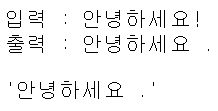

**에포크 50일 때**

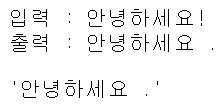

기분이 좋지 않을 때(부정의 감정)

In [98]:
sentence_generation('나 오늘 너무 힘들어..')

입력 : 나 오늘 너무 힘들어..
출력 : 찾아보지 마세요 .


'찾아보지 마세요 .'

**에포크 20일 때**

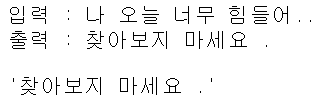

**에포크 50일 때**

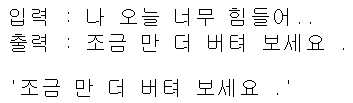

기분이 좋을 때(긍정의 감정)

In [99]:
sentence_generation('나 오늘 기분 너무 좋아 :D')

입력 : 나 오늘 기분 너무 좋아 :D
출력 : 다시 새로 사는 게 마음 편해요 .


'다시 새로 사는 게 마음 편해요 .'

**에포크 20일 때**

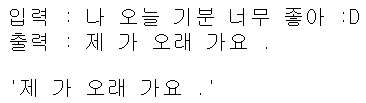

**에포크 50일 때**

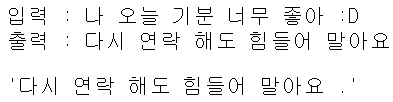

배고플 때

In [100]:
sentence_generation('엄청 배고프다.. 오늘 뭐먹지..?')

입력 : 엄청 배고프다.. 오늘 뭐먹지..?
출력 : 찾아보지 마세요 .


'찾아보지 마세요 .'

**에포크 20일 때**

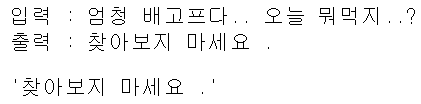

**에포크 50일 때**

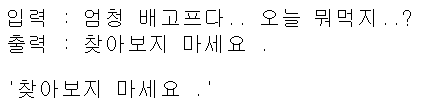

## **2. 회고**
***

**[느낀 점 & 배운 점]**

이번 프로젝트에서는 저번 LSTM 방식과 달리 Transformer 방식으로 문답을 주고 받는 챗봇을 만들어보았다. 학부생 때는 구글 클라우드의 API를 가져와 라인 환경에 얹히는 방식으로 프로젝트를 진행했지만, 이번에는 직접 그 원리에 대해서 배울 수 있어서 뜻깊은 프로젝트가 되지 않았나 싶다. 이번 프로젝트를 진행하면서 과거에 진행했던 챗봇도 다시 확인해봤는데, 과거의 나를 다시 볼 수 있는 계기가 된 것 같아서, 초심으로 돌아간 것 같은 기분을 느꼈다. Transformer 모델에 대해서 아직도 엄청 잘 아는 것은 아니지만, 직접 이러한 모델로 챗봇까지 구현할 수 있어서 좋았다. 앞으로 계속 Transformer 모델과 친하게 지내야 할 것 같은데, 이번 프로젝트를 보면서 항상 복습의 계기로 삼아야겠다는 생각이 들었다.

**[아쉬운 점 & 어려웠던 점]**

앞서 언급했다시피 Transformer 모델이 지금까지 봤던 모델 중에 가장 어렵고, 외워야 할 개념이 많아서 아직 다 익히지를 못했다. 다행히도 유튜브와 chatgpt라는 아주 친근한 친구들이 있기 때문에, 얘네한테 물어보면서 transformer 모델과 더 친해져야 할 것 같다. 아쉬웠던 점은 데이터셋이 적어서 그런지는 모르겠는데, 답변 정확률이 굉장히 떨어지는 것 같았다. 이를 향상하기 위한 방법에는 무엇이 있을까...가 아마 이번주 숙제가 아닐까 싶다.

* [Transformers, explained: Understand the model behind GPT, BERT, and T5(Google Cloud Tech)](https://www.youtube.com/watch?v=SZorAJ4I-sA&t=12s)
* [ransformer models and BERT model: Overview(Google Cloud Tech)](https://www.youtube.com/watch?v=t45S_MwAcOw&t=577s)